## Computing the ring stability of truncated contagion maps in dependence of the (a) threshold and (b) number of contagion steps

In [1]:
%load_ext autoreload
%autoreload 2

import cmap as conmap
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set_theme()
import pandas as pd

# For pretty colourmaps
import palettable
from matplotlib.colors import ListedColormap

sns.set_style("white")

from sklearn.decomposition import PCA

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


We construct a noisy ring lattice network.

In [2]:
noisyRL = conmap.constructNoisyRingLattice(numberNodes=400,geometricDegree=6,nongeometricDegree=2)

# a) Ring stability in dependence of the threshold
We run the truncated contagion maps.

In [3]:
%%time

tVec = np.arange(0,0.625,0.025)
nStepVec = [10,20,np.Inf]

correlationOut = []
ringStabilityOut = []
thresholdOut=[]
nStepOut=[]
for t in tVec:
    print(t)
    
    for nStep in nStepVec:
        contagionMap = conmap.runTruncatedContagionMap(noisyRL,threshold=t,numberSteps=nStep,symmetric=True)
        # compute correlation
        correlation = conmap.computeCorrelationDistances(noisyRL,contagionMap,type='Spearman')
        # compute Ring stability
        ringStability = conmap.callRipser(contagionMap)
        # save
        thresholdOut.append(t)
        nStepOut.append(nStep)

        correlationOut.append(correlation)
        ringStabilityOut.append(ringStability)


# save output DF
contagionMapPerformace = pd.DataFrame()
contagionMapPerformace['threshold'] = thresholdOut
contagionMapPerformace['number steps'] = nStepOut
contagionMapPerformace['spearman correlation'] = correlationOut
contagionMapPerformace['ring stability'] = ringStabilityOut

0.0
0.025
0.05
0.07500000000000001
0.1
0.125
0.15000000000000002
0.17500000000000002
0.2
0.225
0.25
0.275
0.30000000000000004
0.325
0.35000000000000003
0.375
0.4
0.42500000000000004
0.45
0.47500000000000003
0.5
0.525
0.55
0.5750000000000001
0.6000000000000001
CPU times: user 4min 16s, sys: 19.5 s, total: 4min 35s
Wall time: 27min 22s


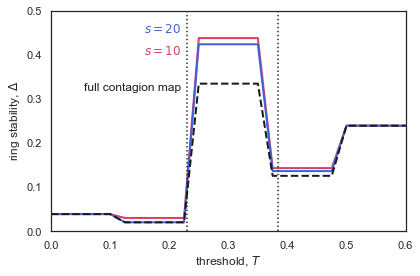

In [4]:
# We select the data we want to plot for each line
data_s10  = contagionMapPerformace[contagionMapPerformace['number steps'] == 10]
data_s20  = contagionMapPerformace[contagionMapPerformace['number steps'] == 20]
data_full  = contagionMapPerformace[contagionMapPerformace['number steps'] == np.inf]

# We plot it
plt.plot(data_s10['threshold'],data_s10['ring stability'],color='#d64161',linewidth=2.0,label='$s=10$')
plt.plot(data_s20['threshold'],data_s20['ring stability'],color='#4161d6',linewidth=2.0,label='$s=20$')
plt.plot(data_full['threshold'],data_full['ring stability'],color='k',linewidth=2.0,label='$s=\infty$', linestyle='--')


plt.xlim([0,0.6])
plt.ylim([0,0.5])

# labels for data line
plt.text(0.22,0.40,s='$s=10$',color='#d64161',ha='right')
plt.text(0.22,0.45,s='$s=20$',color='#4161d6',ha='right')
plt.text(0.22,0.32,s='full contagion map',color='k',ha='right')

# vertical lines
plt.vlines(0.3/(1+0.3),ymin=0,ymax=0.5,color='#282828', linestyle=':')
plt.vlines(1/(2+2*0.3),ymin=0,ymax=0.5,color='#282828', linestyle=':')


plt.xlabel('threshold, $T$')
plt.ylabel('ring stability, $\Delta$')
plt.tight_layout()
plt.savefig('./figures/Fig6a-ringStabilityVsTreshold.pdf')

# b) Ring stability in dependece of the number of steps.

We run the truncated contagion maps.

In [5]:
%%time

tVec = [0.3]
nStepVec = [i for i in range(1,120,1)]
nStepVec.append(np.Inf)

correlationOut = []
ringStabilityOut = []
thresholdOut=[]
nStepOut=[]
for t in tVec:
    for nStep in nStepVec:
        print(nStep)
        contagionMap = conmap.runTruncatedContagionMap(noisyRL,threshold=t,numberSteps=nStep,symmetric=True)
        # compute correlation
        correlation = conmap.computeCorrelationDistances(noisyRL,contagionMap,type='Spearman')
        # compute Ring stability
        ringStability = conmap.callRipser(contagionMap)
        # save
        thresholdOut.append(t)
        nStepOut.append(nStep)

        correlationOut.append(correlation)
        ringStabilityOut.append(ringStability)


# save output DF
contagionMapPerformace_s = pd.DataFrame()
contagionMapPerformace_s['threshold'] = thresholdOut
contagionMapPerformace_s['number steps'] = nStepOut
contagionMapPerformace_s['spearman correlation'] = correlationOut
contagionMapPerformace_s['ring stability'] = ringStabilityOut

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
inf
CPU times: user 9min 15s, sys: 27 s, total: 9min 42s
Wall time: 18min 51s


Plotting

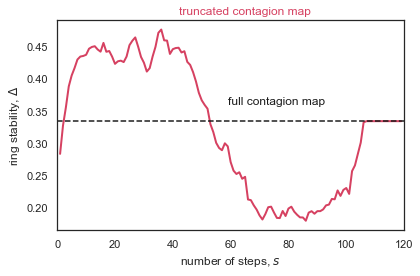

In [6]:

data_t03  = contagionMapPerformace_s[contagionMapPerformace_s['threshold'] == 0.3]
plt.plot(data_t03['number steps'],data_t03['ring stability'],color='#d64161',linewidth=2.0,label='truncated contagion map')
plt.axhline(y=data_t03[data_t03['number steps'] == np.inf]['ring stability'].values[0], color='k', linestyle='--',label=' ')


plt.text(42,0.50,s='truncated contagion map',color='#d64161')
plt.text(59,0.36,s='full contagion map',color='k')
plt.xlim([0,120])

plt.xlabel('number of steps, $s$')
plt.ylabel('ring stability, $\Delta$')
plt.tight_layout()
plt.savefig('./figures/Fig6b-ringStabilityVsSteps.pdf')

### c) Number of steps $s$ for optimal ring stability in dependence of the network size 

In [1]:
%%time

# networkSizeVec = np.ceil(10**np.arange(2,4,0.5))
# networkSizeVec = networkSizeVec.astype(int)
networkSizeVec = np.arange(50,525,25)

tVec = [0.3]
nStepVec = [i for i in range(1,120,5)]
nStepVec.append(np.Inf)


ringStabilityOut = []
thresholdOut=[]
nStepOut=[]
networkSizeOut=[]

for networkSize in networkSizeVec:
    print(networkSize)
    noisyRL = conmap.constructNoisyRingLattice(numberNodes=networkSize,geometricDegree=6,nongeometricDegree=2)
    for t in tVec:
        for nStep in nStepVec:
           
            contagionMap = conmap.runTruncatedContagionMap(noisyRL,threshold=t,numberSteps=nStep,symmetric=True)
            # compute Ring stability
            ringStability = conmap.callRipser(contagionMap)
            # save
            thresholdOut.append(t)
            nStepOut.append(nStep)
            networkSizeOut.append(networkSize)

            ringStabilityOut.append(ringStability)





NameError: name 'np' is not defined

In [31]:
# save output DF
contagionMapPerformace_s = pd.DataFrame()
contagionMapPerformace_s['threshold'] = thresholdOut
contagionMapPerformace_s['number steps'] = nStepOut
contagionMapPerformace_s['network size'] = networkSizeOut
contagionMapPerformace_s['ring stability'] = ringStabilityOut

In [32]:
# find the optimal number of steps for each of the sizes

optimalStepSize_Out=[]
for networkSize in networkSizeVec:
    # 
    dataThisNetworkSize = contagionMapPerformace_s[contagionMapPerformace_s['network size'] == networkSize]
    # find it
    bestStepSize = dataThisNetworkSize['number steps'][dataThisNetworkSize['ring stability'].idxmax()]
    # save it
    optimalStepSize_Out.append(bestStepSize)

    # should we find /pm 10% of the optimal ring stability?


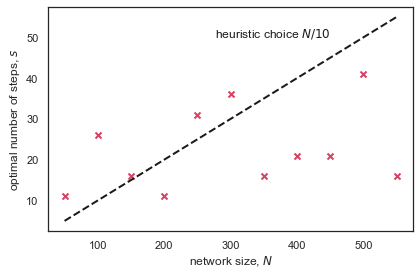

In [33]:
plt.plot(networkSizeVec,0.1*networkSizeVec,color='k',linewidth=2.0,label='truncated contagion map',linestyle='--')
plt.scatter(networkSizeVec,optimalStepSize_Out,color='#d64161',linewidth=2.0,label='heuristic',marker='x')


plt.text(450,50,s='heuristic choice $N/10$',color='k',ha='right')


plt.ylabel('optimal number of steps, $s$')
plt.xlabel('network size, $N$')
plt.tight_layout()
plt.savefig('./figures/Fig6c-optimalNumberSteps.pdf')

In [30]:
np.mean(optimalStepSize_Out/networkSizeVec)

0.1037853207398662

In [34]:
optimalStepSize_Out

[11.0, 26.0, 16.0, 11.0, 31.0, 36.0, 16.0, 21.0, 21.0, 41.0, 16.0]

In [35]:
networkSizeVec

array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550])